# Day 20 A Simple FFNN using pytorch

> Something is wrong in this notebook with model. FInd out.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.nn.functional as F
from torch import nn, optim
import torchvision

plt.style.use('seaborn-whitegrid')

In [2]:
def dataset(file):
    current_datafile = open(file, 'r')
    current_dataset = current_datafile.readlines()
    current_datafile.close()

    datasets = np.zeros([len(current_dataset), 1025])
    for i in range(len(current_dataset)):
        example = current_dataset[i].split(',')
        
        labels = np.asarray(example[0], dtype = np.float32)
        images = np.asarray(example[1:], dtype=np.float32) / 255 * 0.01 + 0.99
        
        example = np.hstack([labels, images])
        datasets[i] = example
    return datasets

In [3]:
trainloader = th.utils.data.DataLoader(dataset('train.csv'), shuffle = True, batch_size = 32)
testloader = th.utils.data.DataLoader(dataset('train.csv'), shuffle = True, batch_size = 32)

In [4]:
model = nn.Sequential(nn.Linear(1024, 512),
                      nn.Sigmoid(),
                      nn.Dropout(),
                      nn.Linear(512, 256),
                      nn.Sigmoid(),
                      nn.Dropout(),
                      nn.Linear(256, 128),
                      nn.Sigmoid(),
                      nn.Dropout(),
                     nn.Linear(128, 10),
                     nn.Dropout(),
                     nn.Softmax(-1))


In [5]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [6]:
#check the model if its fine working

example = next(iter(trainloader))
out = model(example[0][1:].float())
print(out)

tensor([0.0750, 0.1712, 0.0936, 0.0872, 0.0872, 0.0872, 0.0488, 0.0872, 0.0872,
        0.1754], grad_fn=<SoftmaxBackward>)


In [7]:
epochs = 30
train_losses, test_losses = [], []
train_accuracy = []
for epoch in range(epochs):
    running_loss = 0
    for example in trainloader:
        label = th.Tensor([example[0][0].float()]).long()
        image = th.reshape(example[0][1:], (1, 1024))

        image = image.view(image.shape[0], -1).float()
    #     print(label)

        logps = model(image) 
#         print(logps.shape)
        loss = criterion(logps, label)


    #         print(logps, label)


#         print(logps)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
#         with th.no_grad():
        for example in testloader:
         
            label = th.Tensor([example[0][0].float()]).long()
            image = th.reshape(example[0][1:], (1, 1024))

            image = image.view(image.shape[0], -1).float()
        #     print(label)

            logps = model(image) 
            test_loss += criterion(logps, label.long())

            ps = th.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == label.view(*top_class.shape)
            accuracy += th.mean(equals.type(th.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        train_accuracy.append(accuracy / len(testloader))

        print("Epoch: {}/{}.. ".format(epoch + 1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/30..  Training Loss: 2.302..  Test Loss: 2.308..  Test Accuracy: 0.092
Epoch: 2/30..  Training Loss: 2.305..  Test Loss: 2.304..  Test Accuracy: 0.102
Epoch: 3/30..  Training Loss: 2.302..  Test Loss: 2.305..  Test Accuracy: 0.100
Epoch: 4/30..  Training Loss: 2.304..  Test Loss: 2.302..  Test Accuracy: 0.118
Epoch: 5/30..  Training Loss: 2.306..  Test Loss: 2.304..  Test Accuracy: 0.103
Epoch: 6/30..  Training Loss: 2.303..  Test Loss: 2.308..  Test Accuracy: 0.085
Epoch: 7/30..  Training Loss: 2.307..  Test Loss: 2.301..  Test Accuracy: 0.111
Epoch: 8/30..  Training Loss: 2.307..  Test Loss: 2.303..  Test Accuracy: 0.085
Epoch: 9/30..  Training Loss: 2.303..  Test Loss: 2.303..  Test Accuracy: 0.109
Epoch: 10/30..  Training Loss: 2.301..  Test Loss: 2.304..  Test Accuracy: 0.120
Epoch: 11/30..  Training Loss: 2.307..  Test Loss: 2.302..  Test Accuracy: 0.124
Epoch: 12/30..  Training Loss: 2.305..  Test Loss: 2.304..  Test Accuracy: 0.096
Epoch: 13/30..  Training Loss: 2.304.

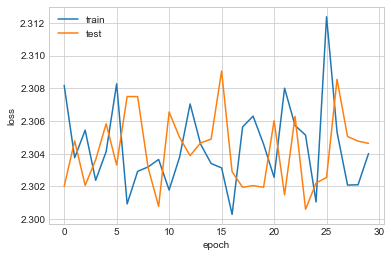

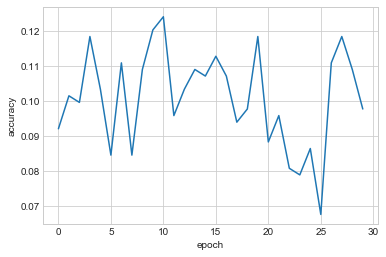

In [8]:
plt.plot(test_losses)
plt.plot(train_losses)

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

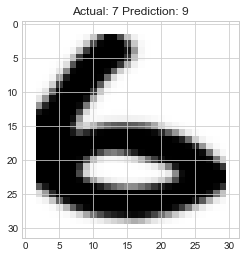

In [9]:
example = next(iter(testloader))

label = example[0][0]
image = th.reshape(example[0][1:], (1, 1024))
image = image.view(image.shape[0], -1).float()
prediction = model(image)

pred_label = th.argmax(prediction)

title = f"Actual: {int(label)} Prediction: {pred_label}"

plt.imshow(image.reshape(32, 32))
plt.title(title)
plt.show()

In [10]:
th.save(model.state_dict(), 'dcr.pth')

In [11]:
state_dict = th.load('dcr.pth')
model = load_state_dict(state_dict)

NameError: name 'load_state_dict' is not defined